In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
### 傅里叶变换经常被用来分析不同滤波器的频率特性。我们可以使用 2D 离散傅里叶变换 (DFT) 分析图像的频域特性。实现 DFT 的一个快速算法被称为快速傅里叶变换（FFT）
### 对于一个正弦信号：x(t) = Asin(2πft), 它的频率为 f，如果把这个信号转到它的频域表示，我们会在频率 f 中看到一个峰值。如果我们的信号是由采样产生的离散信号好组成，我们会得到类似的频谱图，只不过前面是连续的，现在是离散。
### 你可以把图像想象成沿着两个方向采集的信号。所以对图像同时进行 X 方向和 Y 方向的傅里叶变换，我们就会得到这幅图像的频域表示（频谱图）
### 更直观一点，对于一个正弦信号，如果它的幅度变化非常快，我们可以说他是高频信号，如果变化非常慢，我们称之为低频信号。你可以把这种想法应用到图像中，图像那里的幅度变化非常大呢？边界点或者噪声。
### 所以我们说边界和噪声是图像中的高频分量（注意这里的高频是指变化非常快，而非出现的次数多）。如果没有如此大的幅度变化我们称之为低频分量。

### numpy 中的傅立叶变换

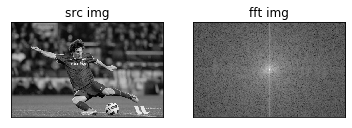

In [6]:
img = cv2.imread('F:/opencv/img/messi5.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('src img')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('fft img')
plt.xticks([])
plt.yticks([])
plt.show()

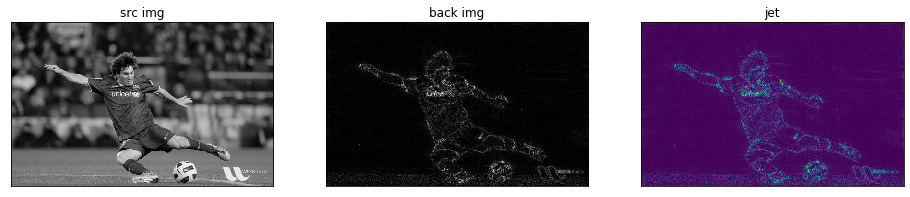

In [14]:
### 我们可以看到输出结果的中心部分更白（亮），这说明低频分量更多。现在我们可以进行频域变换了，我们就可以在频域对图像进行一些操作了，例如高通滤波和重建图像（DFT 的逆变换）。
### 比如我们可以使用一个60x60 的矩形窗口对图像进行掩模操作从而去除低频分量。然后再使用函数np.fft.ifftshift() 进行逆平移操作，所以现在直流分量又回到左上角了，左后使用函数 np.ifft2() 进行 FFT 逆变换。
### 同样又得到一堆复杂的数字，我们可以对他们取绝对值
rows, cols = img.shape
crows, ccols = int(rows/2), int(cols/2)
fshift[crows-30:crows+30, ccols-30:ccols+30] = 0
f_fshift = np.fft.ifftshift(fshift)
img_back = np.abs(np.fft.ifft2(f_fshift))
plt.figure(figsize=(16, 12))
plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.title('src img')
plt.xticks([])
plt.yticks([])
plt.subplot(132)
plt.imshow(img_back, cmap='gray')
plt.title('back img')
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(img_back)
plt.title('jet')
plt.xticks([])
plt.yticks([])
plt.show()



### Opencv 中的傅立叶变换

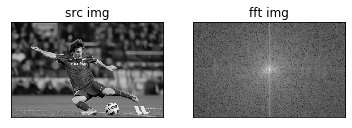

In [15]:
### OpenCV 中相应的函数是 cv2.dft() 和 cv2.idft()。和前面输出的结果一样，但是是双通道的。
### 第一个通道是结果的实数部分，第二个通道是结果的虚数部分。输入图像要首先转换成 np.float32 格式。我们来看看如何操作。

img = cv2.imread('F:/opencv/img/messi5.jpg', 0)
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('src img')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('fft img')
plt.xticks([])
plt.yticks([])
plt.show()

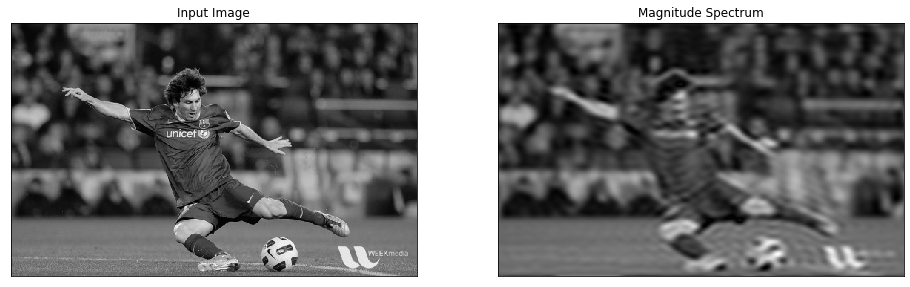

In [27]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.figure(figsize=(16, 12))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### DFT性能优化

In [ ]:
### 数组的大小为某些值时 DFT 的性能会更好。当数组的大小是 2 的指数时 DFT 效率最高。当数组的大小是 2，3，5 的倍数时效率也会很高。
### 所以如果你想提高代码的运行效率时，你可以修改输入图像的大小（补 0）。对于OpenCV 你必须自己手动补 0。但是 Numpy，你只需要指定 FFT 运算的大小，它会自动补 0。
### 那我们怎样确定最佳大小呢？OpenCV 提供了一个函数:cv2.getOptimalDFTSize()。

In [24]:
img.shape

(342, 548)

In [25]:
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
nrows

360

In [26]:
ncols

576

In [30]:
n_img = np.zeros(shape = (nrows, ncols))  
n_img[:rows,:cols] = img    ### 相当于把比原图片大的地方补0
%timeit fft1 = np.fft.fft2(img)

22.4 ms ± 269 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%timeit fft2 = np.fft.fft2(img, [nrows,ncols])

8.9 ms ± 60.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%timeit fft3 = np.fft.fft2(n_img)

7.36 ms ± 83.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%timeit dft1= cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)

2.76 ms ± 46.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
%timeit dft2= cv2.dft(np.float32(n_img),flags=cv2.DFT_COMPLEX_OUTPUT)

1.69 ms ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 高通滤波器（HPF) 
### Sobel算子， 拉普拉斯算子

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [43]:
mean_filter = np.ones(shape =(3,3))
x = cv2.getGaussianKernel(5, 10)
gaussian = x*x.T
gaussian

array([[0.0392052 , 0.03979772, 0.0399972 , 0.03979772, 0.0392052 ],
       [0.03979772, 0.04039918, 0.04060168, 0.04039918, 0.03979772],
       [0.0399972 , 0.04060168, 0.0408052 , 0.04060168, 0.0399972 ],
       [0.03979772, 0.04039918, 0.04060168, 0.04039918, 0.03979772],
       [0.0392052 , 0.03979772, 0.0399972 , 0.03979772, 0.0392052 ]])

In [44]:
scharr = np.array([[-3, 0, 3],
[-10,0,10],
[-3, 0, 3]])
scharr

array([[ -3,   0,   3],
       [-10,   0,  10],
       [ -3,   0,   3]])

In [45]:
sobel_x= np.array([[-1, 0, 1],
[-2, 0, 2],
[-1, 0, 1]])
sobel_x

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [47]:
sobel_y= np.array([[-1,-2,-1],
[0, 0, 0],
[1, 2, 1]])
sobel_y

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [49]:
laplacian=np.array([[0, 1, 0],
[1,-4, 1],
[0, 1, 0]])
laplacian

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

In [50]:
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', 'sobel_y', 'scharr_x']

In [51]:
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

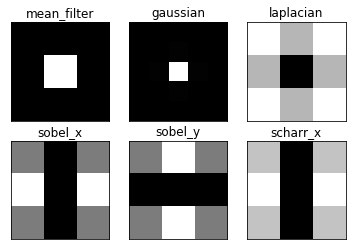

In [55]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(mag_spectrum[i], cmap = 'gray')
    plt.title(filter_name[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

### 模板匹配

In [ ]:
###  模板匹配是用来在一副大图中搜寻查找模版图像位置的方法。OpenCV 为我们提供了函数：cv2.matchTemplate()。和 2D 卷积一样，它也是用模板图像在输入图像（大图）上滑动，
### 并在每一个位置对模板图像和与其对应的输入图像的子区域进行比较。OpenCV 提供了几种不同的比较方法（细节请看文档）。返回的结果是一个灰度图像，每一个像素值表示了此区域与模板的匹配程度
### 如果输入图像的大小是（WxH），模板的大小是（wxh），输出的结果的大小就是（W-w+1，H-h+1）。当你得到这幅图之后，就可以使用函数cv2.minMaxLoc() 
### 来找到其中的最小值和最大值的位置了。第一个值为矩形左上角的点（位置），（w，h）为 moban 模板矩形的宽和高。这个矩形就是找到的模板区域了。
### 注意：如果你使用的比较方法是 cv2.TM_SQDIFF，最小值对应的位置才是匹配的区域。

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cv2.TM_SQDIFF


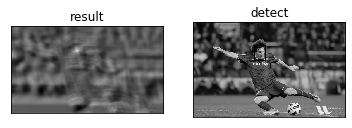

cv2.TM_SQDIFF_NORMED


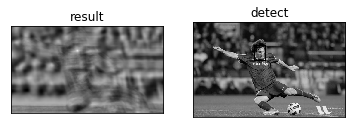

cv2.TM_CCORR


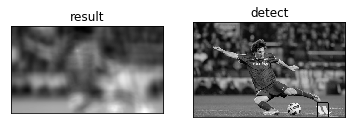

cv2.TM_CCORR_NORMED


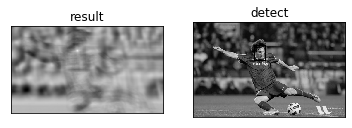

cv2.TM_CCOEFF


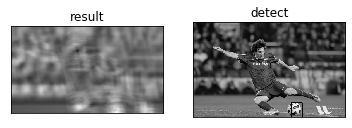

cv2.TM_CCOEFF_NORMED


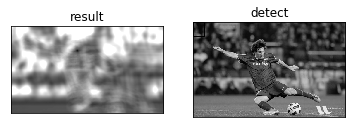

In [93]:
img = cv2.imread('f:/opencv/img/messi5.jpg', 0)
template = cv2.imread('f:/opencv/img/messi_face.jpg', 0)
w, h = template.shape[::-1]
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for method in methods:
    img_cp = img.copy()
    method = eval(method)  ### eval 语句用来计算存储在字符串中的有效 Python 表达式  如： cv2.TM_CCOEFF 这是个整形const cv2.TM_CCOEFF = 4   eval('cv2.TM_CCOEFF') = 4  
    print(methods[method])
    res = cv2.matchTemplate(img_cp, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_cp, top_left, bottom_right, (0, 255, 0), 2)
    plt.subplot(121)
    plt.imshow(res, cmap='gray')
    plt.title('result')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(img_cp, cmap='gray')
    plt.title('detect')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    

In [ ]:
### 多对像匹配
### 在前面的部分，我们在图片中搜素梅西的脸，而且梅西只在图片中出现了一次。假如你的目标对象只在图像中出现了很多次怎么办呢？函数cv.imMaxLoc() 只会给出最大值和最小值。
### 此时，我们就要使用阈值了。

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot  as plt

In [94]:
img = cv2.imread('f:/opencv/img/mario.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('f:/opencv/img/mario_plate.jpg', 0)
w, h = template.shape[::-1]
print('w: {}, h: {}'.format(w,h))

ret = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(ret >= threshold)
print(len(loc))
print(loc)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
cv2.imshow('result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


w: 24, h: 24
2
(array([128, 128, 128, 128, 226, 226, 226, 226], dtype=int64), array([342, 343, 370, 371, 276, 277, 304, 305], dtype=int64))
